In [2]:
import dataset_generation
import prefix_span
import spade
import spam
import time
import matplotlib.pyplot as plt
import numpy as np 

dataset_generation_obj = dataset_generation.Dataset
spade_obj = spade.Spade
spam_obj = spam.Spam
prefix_span_obj = prefix_span.PrefixSpan

In [10]:
# CASE 1
spade_duration_list = []
spam_duration_list = []
prefix_span_duration_list = []
size = []

#num_sequences = 10
max_sequence_length = 20
num_items = 5

for i in range(1, 16):
  gap = 100
  size.append(i*gap)
  sequences = dataset_generation.Dataset.generate(i*gap, max_sequence_length, num_items)
  # Print the generated sequences
  print("Generated sequences:\n")
  for seq in sequences:
      print(seq)
  print('\n')

  support = 0.8*i*gap

  # SPADE
  start_time = time.perf_counter()

  spade_obj.run(sequences, support)

  end_time = time.perf_counter()

  duration = end_time-start_time

  spade_duration_list.append(duration)
  print("Duration SPADE: "+ str(duration))

  # SPAM
  start_time = time.perf_counter()

  spam_obj.run(sequences, support)

  end_time = time.perf_counter()

  duration = end_time - start_time

  spam_duration_list.append(duration)
  print("Duration SPAM: "+ str(duration))
  
  # PrefixSpan
  start_time = time.perf_counter()

  prefix_span_obj.run(sequences, support)

  end_time = time.perf_counter()

  duration = end_time - start_time

  prefix_span_duration_list.append(duration)
  print("Duration PrefixSpan: "+ str(duration))            


Generated sequences:

[{1, 2, 4, 5}, {2, 3, 5}, {1, 2, 3, 4}, {3, 4}, {1, 3, 5}, {2}, {2, 4, 5}]
[{1, 2, 3, 4, 5}, {5}, {3}, {1}, {1, 2, 3, 4, 5}, {1, 2, 3, 4, 5}, {4}, {3}]
[{3, 5}, {1, 2, 3, 4, 5}, {1}, {5}, {1, 2, 3, 4}, {3, 5}, {1, 2, 3, 4, 5}]
[{5}, {1, 2, 3, 4}, {3, 4}, {1}, {1, 4}, {4}, {2, 3, 5}, {1, 2, 3, 4, 5}, {5}]
[{1, 2, 3, 5}, {1, 2, 3, 4, 5}, {5}, {3, 4}, {1, 2, 3, 4, 5}, {1}, {1}, {4}]
[{1, 3, 4, 5}, {1, 2, 3, 4}, {1, 2, 3, 5}, {1, 3, 5}, {2, 3, 4}, {2, 5}]
[{1, 2, 3, 4, 5}, {3, 4, 5}, {2, 3}, {2}, {1, 2, 3, 4, 5}, {1, 2, 3}, {4}]
[{1, 2, 4, 5}, {1, 2}, {1, 2, 3, 4, 5}, {2, 4}, {5}, {3, 4}, {5}, {3, 4}, {2}]
[{2, 3, 4}, {1, 3, 4, 5}, {4}, {2, 3}, {1, 2, 3, 4, 5}, {1, 2, 3, 4, 5}]
[{3, 4, 5}, {2, 4}, {3}, {1}, {1}, {1, 2, 4}, {1, 2, 3, 4, 5}, {1, 3, 5}, {4}]
[{1, 2, 3, 4}, {3}, {1, 2, 3, 5}, {1, 2, 3, 4, 5}, {3, 4, 5}, {2, 4, 5}]
[{1, 3, 4, 5}, {2}, {1, 4, 5}, {4}, {1, 2}, {1, 3, 4, 5}, {2, 4, 5}, {3, 5}]
[{3, 4}, {5}, {5}, {1, 2, 3, 4, 5}, {1, 2, 3, 4, 5}, {1, 2, 3, 4, 

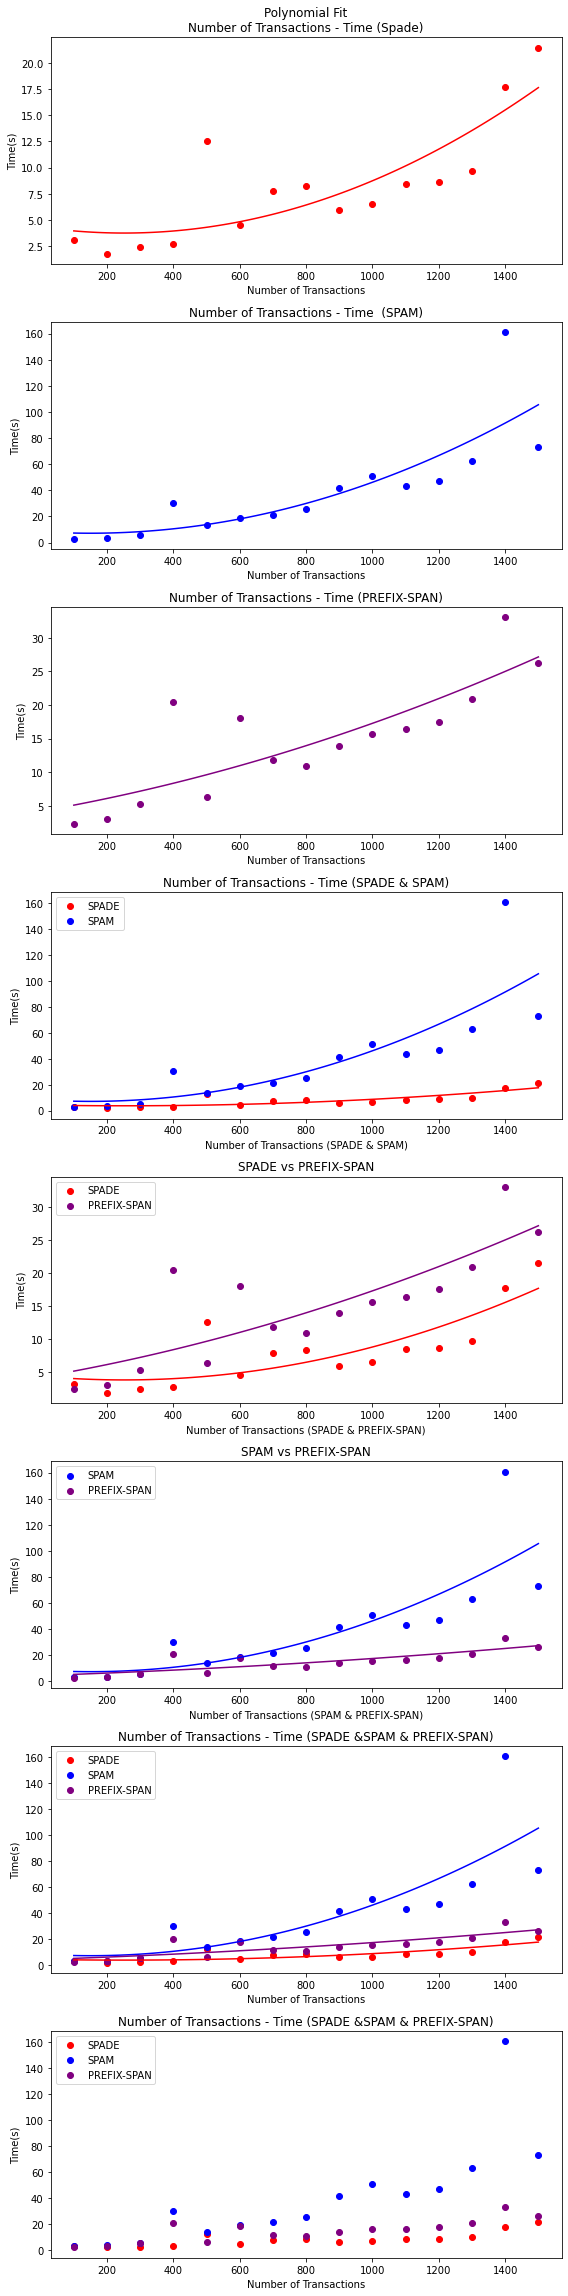

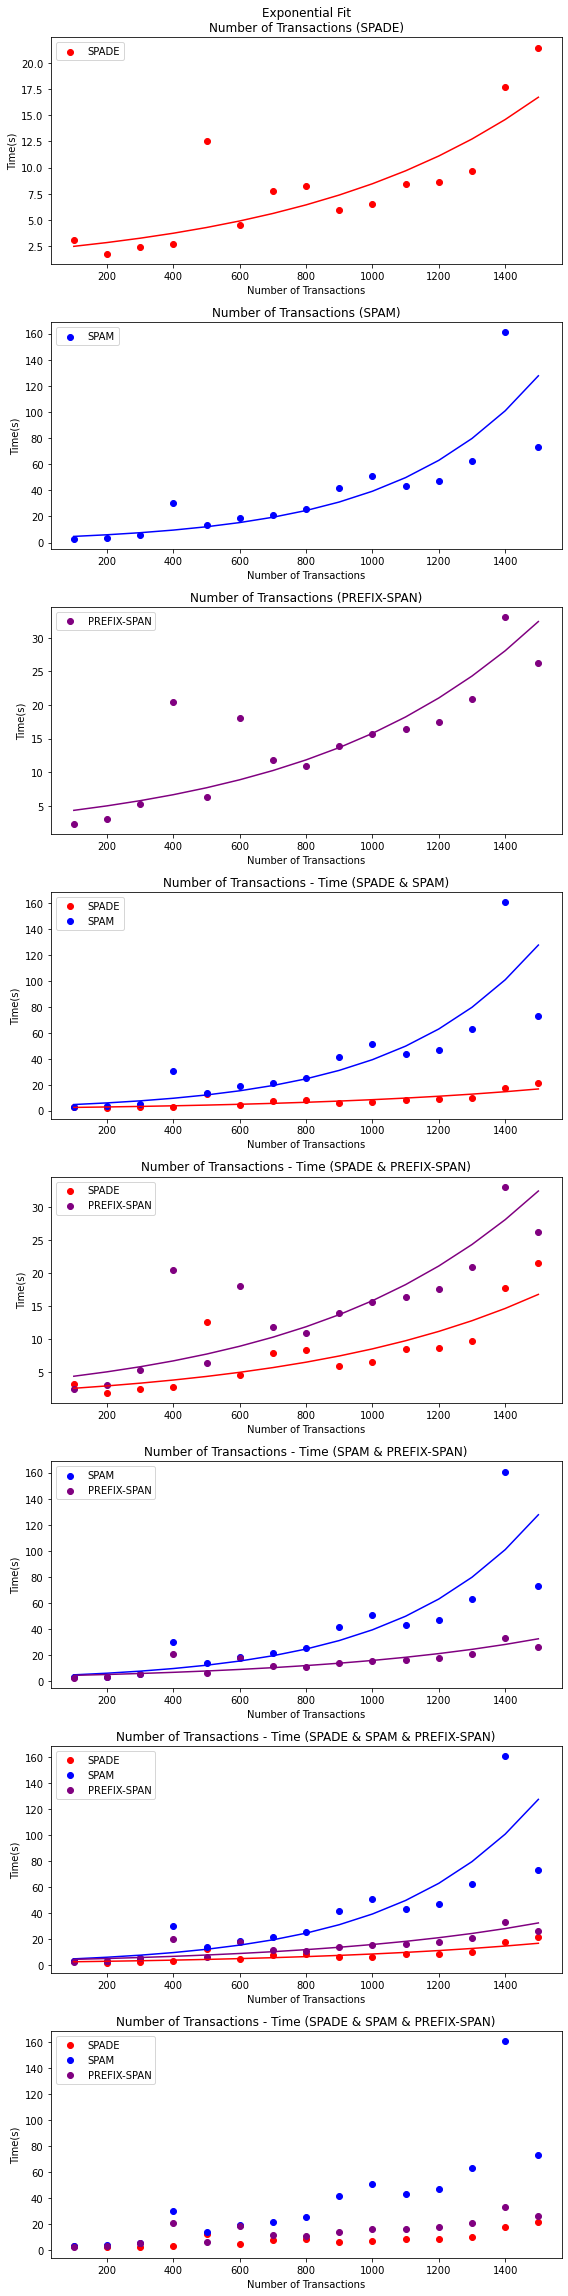

In [11]:
# Polynomial Fit
# Define the x and y values for the scatter plot
spade_x = size
spade_y = spade_duration_list

spam_x = size
spam_y = spam_duration_list

prefix_span_x = size
prefix_span_y = prefix_span_duration_list

# Fit a second-degree polynomial function to the data using polyfit
spade_fit = np.polyfit(spade_x, spade_y, 2)
spam_fit = np.polyfit(spam_x, spam_y, 2)
prefix_span_fit = np.polyfit(prefix_span_x, prefix_span_y, 2)

# Create a separate plot for each algorithm
plt.figure(figsize=(8, 32))

# Plot the data and best fit curve for SPADE
plt.subplot(8, 1, 1)
plt.scatter(spade_x, spade_y, color='red')
spade_curve = np.poly1d(spade_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
plt.title('Polynomial Fit\nNumber of Distinct Items - Time (Spade)')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')

# Plot the data and best fit curve for SPAM
plt.subplot(8, 1, 2)
plt.scatter(spam_x, spam_y, color='blue')
spam_curve = np.poly1d(spam_fit)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spam_range, spam_curve(spam_range), color='blue')
plt.title('Number of Distinct Items - Time  (SPAM)')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')

# Plot the data and best fit curve for PrefixSpan
plt.subplot(8, 1, 3)
plt.scatter(prefix_span_x, prefix_span_y, color='purple')
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(prefix_span_range), color='purple')
plt.title('Number of Distinct Items - Time (PREFIX-SPAN)')
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')

# Plot the data and best fit curve for SPADE and SPAM
plt.subplot(8, 1, 4)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
spade_curve = np.poly1d(spade_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
spam_curve = np.poly1d(spam_fit)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spam_range, spam_curve(spam_range), color='blue')
plt.title('Number of Transactions - Time (SPADE & SPAM)')
plt.xlabel('Number of Transactions (SPADE & SPAM)')
plt.ylabel('Time(s)')
plt.legend()

# Plot the data and best fit curve for SPADE and PrefixSpan
plt.subplot(8, 1, 5)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spade_curve = np.poly1d(spade_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(prefix_span_range), color='purple')
plt.title('SPADE vs PREFIX-SPAN')
plt.xlabel('Number of Transactions (SPADE & PREFIX-SPAN)')
plt.ylabel('Time(s)')
plt.legend()

# Plot the data and best fit curve for SPAM and PrefixSpan
plt.subplot(8, 1, 6)
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spam_curve = np.poly1d(spam_fit)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spam_range, spam_curve(spam_range), color='blue')
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(prefix_span_range), color='purple')
plt.title('SPAM vs PREFIX-SPAN')
plt.xlabel('Number of Transactions (SPAM & PREFIX-SPAN)')
plt.ylabel('Time(s)')
plt.legend()

plt.subplot(8, 1, 7)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spade_curve = np.poly1d(spade_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
spam_curve = np.poly1d(spam_fit)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spam_range, spam_curve(spam_range), color='blue')
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(spam_range), color='purple')
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')
plt.title('Number of Transactions - Time (SPADE &SPAM & PREFIX-SPAN)')
plt.legend()

plt.subplot(8, 1, 8)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')
plt.title('Number of Transactions - Time (SPADE &SPAM & PREFIX-SPAN)')
plt.legend()

# Adjust the layout of the plots and display them
plt.tight_layout()
plt.show()



# Exponential Fit
# Define the x and y values for the scatter plot
spade_x = np.array(size)
spade_y = spade_duration_list

spam_x = np.array(size)
spam_y = spam_duration_list

prefix_span_x = np.array(size)
prefix_span_y = prefix_span_duration_list

# Fit a second-degree polynomial function to the data using polyfit
spade_fit = np.polyfit(spade_x, np.log(spade_y), 1)
spam_fit = np.polyfit(spam_x, np.log(spam_y), 1)
prefix_span_fit = np.polyfit(prefix_span_x, np.log(prefix_span_y), 1)

# Create a figure with a size of 8x6 inches
plt.figure(figsize=(8,32))

# Create the first subplot for SPADE
plt.subplot(8,1,1)
# Create the scatter plot for SPADE
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
# Plot the best fit curve for SPADE
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
# Add labels and title to the plot
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')
plt.title('Exponential Fit\nNumber of Transactions (SPADE)')
# Add a legend to the plot
plt.legend()

# Create the second subplot for SPAM
plt.subplot(8,1,2)
# Create the scatter plot for SPAM
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
# Plot the best fit curve for SPAM
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
# Add labels and title to the plot
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')
plt.title('Number of Transactions (SPAM)')
# Add a legend to the plot
plt.legend()

# Create the third subplot for PREFIX-SPAN
plt.subplot(8,1,3)
# Create the scatter plot for PREFIX-SPAN
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
# Plot the best fit curve for PREFIX-SPAN
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
# Add labels and title to the plot
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')
plt.title('Number of Transactions (PREFIX-SPAN)')
# Add a legend to the plot
plt.legend()

# Create the first subplot for SPADE and SPAM
plt.subplot(8,1,4)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')
plt.title('Number of Transactions - Time (SPADE & SPAM)')
plt.legend()

# Create the second subplot for SPADE and PREFIX-SPAN
plt.subplot(8,1,5)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')
plt.title('Number of Transactions - Time (SPADE & PREFIX-SPAN)')
plt.legend()

# Create the third subplot for SPAM and PREFIX-SPAN
plt.subplot(8,1,6)
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')
plt.title('Number of Transactions - Time (SPAM & PREFIX-SPAN)')
plt.legend()

plt.subplot(8,1,7)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')
plt.title('Number of Transactions - Time (SPADE & SPAM & PREFIX-SPAN)')
plt.legend()

plt.subplot(8,1,8)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')
plt.title('Number of Transactions - Time (SPADE & SPAM & PREFIX-SPAN)')
plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()
# Show the plots
plt.show()


In [4]:
# CASE 2
spade_duration_list = []
spam_duration_list = []
prefix_span_duration_list = []
size = []

num_sequences = 100
#max_sequence_length = 20
num_items = 20

dataset_generation_obj = dataset_generation.Dataset
spade_obj = spade.Spade
spam_obj = spam.Spam

for i in range(9, 20):
  gap = 3
  size.append(i*gap)
  sequences = dataset_generation.Dataset.generate(num_sequences, i*gap, num_items)
  # Print the generated sequences
  print("Generated sequences:\n")
  for seq in sequences:
      print(seq)
  print('\n')

  support = 0.8*num_sequences

  # SPADE
  start_time = time.perf_counter()

  spade_obj.run(sequences, support)
  
  end_time = time.perf_counter()

  duration = end_time-start_time

  spade_duration_list.append(duration)
  print("Duration SPADE: "+ str(duration))

  # SPAM
  start_time = time.perf_counter()

  spam_obj.run(sequences, support)

  end_time = time.perf_counter()

  duration = end_time - start_time

  spam_duration_list.append(duration)
  print("Duration SPAM: "+ str(duration))
  
  # PrefixSpan
  start_time = time.perf_counter()

  prefix_span_obj.run(sequences, support)
  
  end_time = time.perf_counter()

  duration = end_time - start_time

  prefix_span_duration_list.append(duration)
  print("Duration PrefixSpan: "+ str(duration))            

Generated sequences:

[{1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19}, {3, 15}, {1, 7, 9, 11, 13, 15}, {20, 13}]
[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}, {4, 7, 10, 11, 16, 19, 20}]
[{1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20}, {16, 8, 19, 12}, {2, 4, 5, 9, 17}]
[{2, 3, 4, 5, 7, 8, 9, 10, 13, 14, 15, 16, 18, 20}, {17, 19, 14}, {19}, {16, 11, 19, 6}, {17, 4, 14}, {10}, {4}]
[{8, 18}, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19}, {1, 4, 11, 12, 14, 15}, {5}]
[{7, 8, 9, 14, 15, 18}, {1, 2, 3, 4, 5, 10, 11, 13, 14, 16, 20}, {4, 5, 7, 8, 9, 13, 14, 18, 19}, {4}]
[{19, 18, 3, 6}, {1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}, {7, 8, 11, 12, 14}]
[{2, 3, 4, 5, 7, 8, 9, 11, 13, 14, 15, 16, 17, 20}, {3}, {3, 4, 6, 10, 13, 14, 17, 19}, {2, 11, 12}, {18}]
[{1, 2, 3, 4, 5, 6, 11, 13, 14, 15, 16, 17, 18, 20}, {17}, {12}, {1, 8, 11, 12, 17, 19}, {9, 15}, {1, 10, 20}]
[{1, 2, 3, 4, 5, 6, 7, 8, 9,

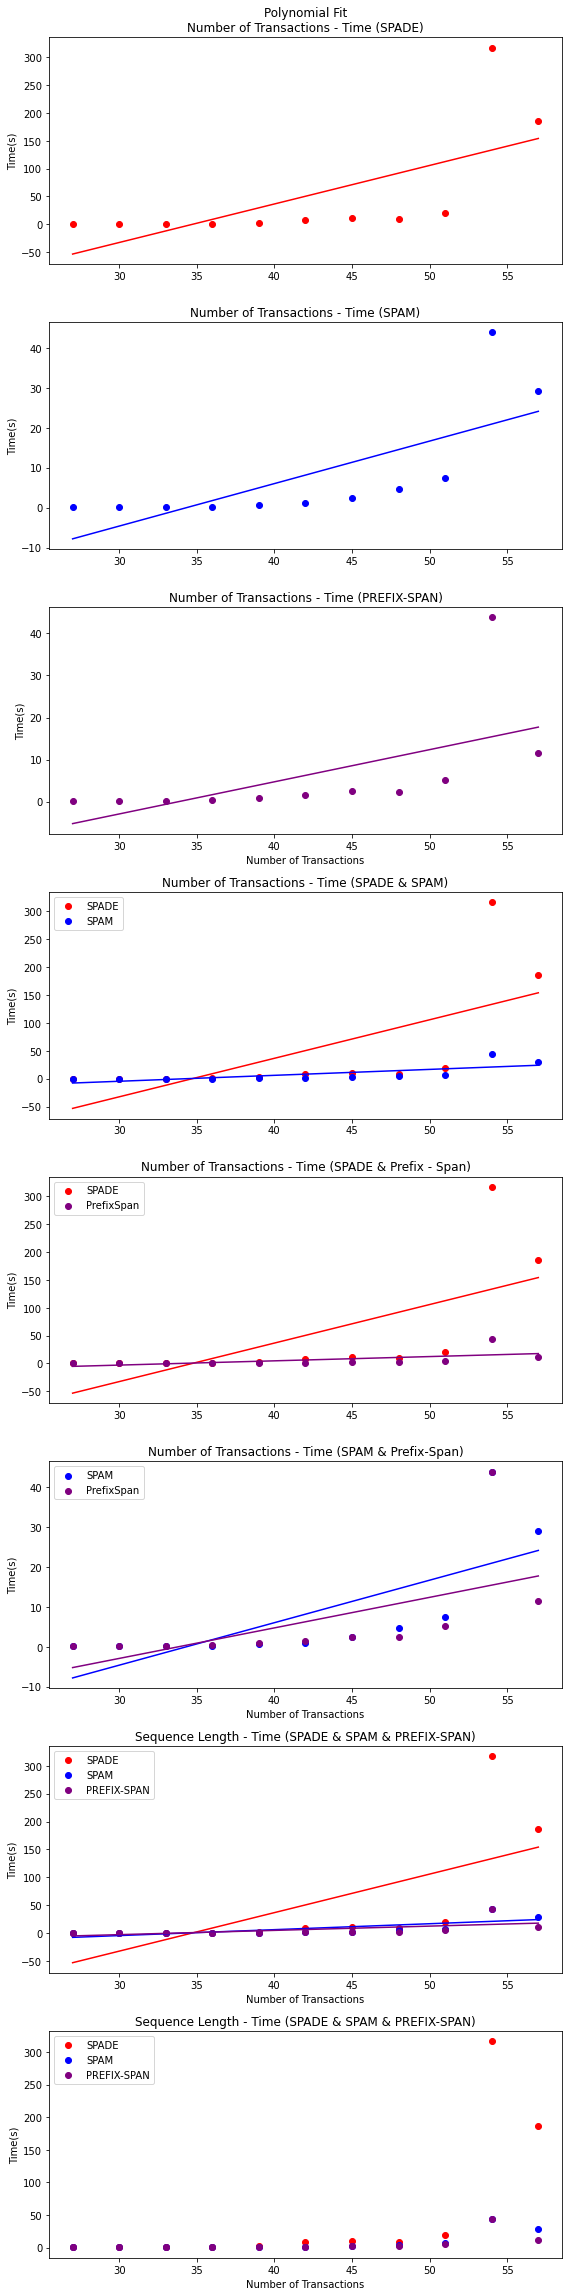

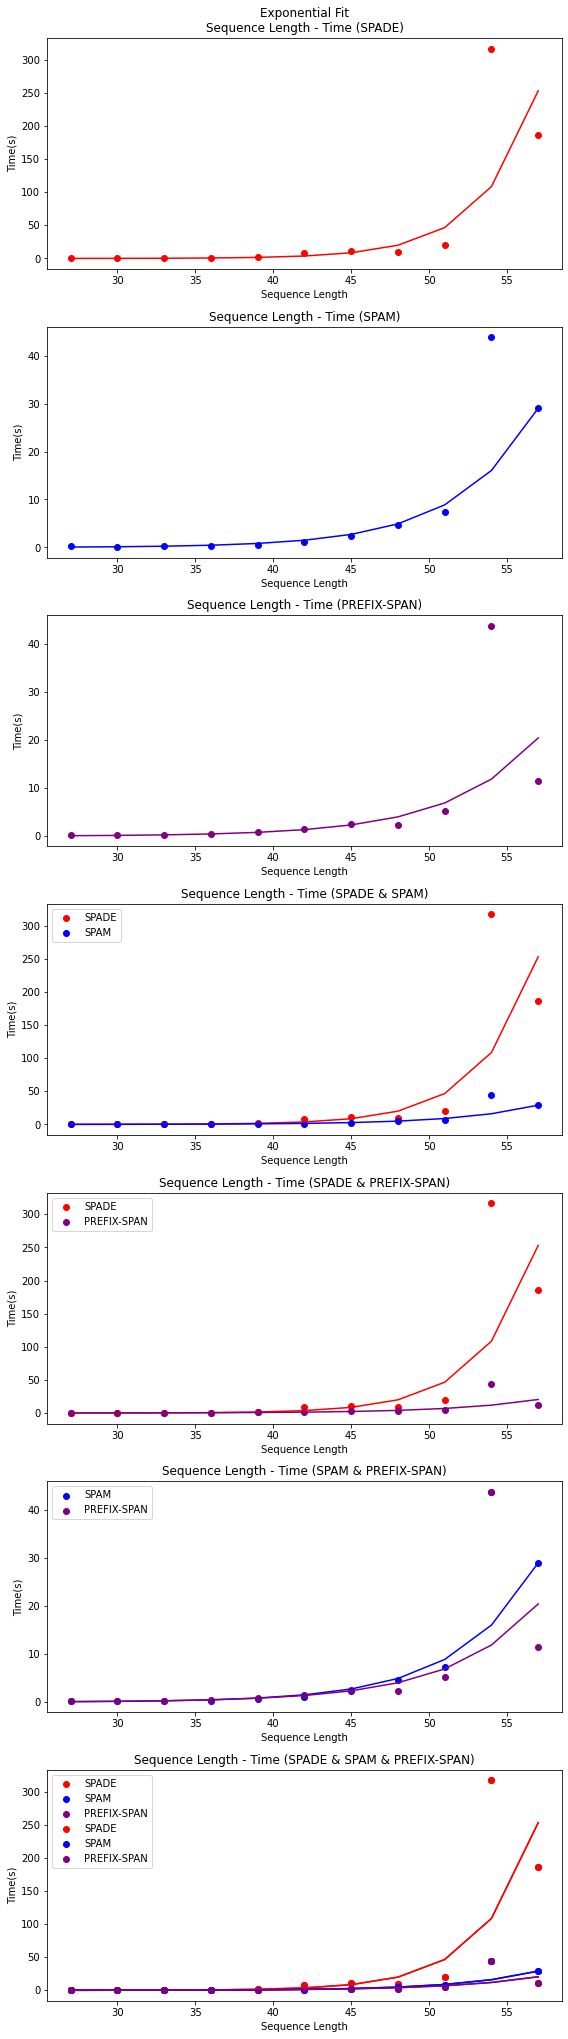

In [5]:
# Polynomial Fit
# Define the x and y values for the scatter plot
spade_x = size
spade_y = spade_duration_list

spam_x = size
spam_y = spam_duration_list

prefix_span_x = size
prefix_span_y = prefix_span_duration_list

# Fit a second-degree polynomial function to the data using polyfit
spade_fit = np.polyfit(spade_x, spade_y, 1)
spam_fit = np.polyfit(spam_x, spam_y, 1)
prefix_span_fit = np.polyfit(prefix_span_x, prefix_span_y, 1)

# Create the figure and three subplots
plt.figure(figsize=(8, 32))

plt.subplot(8, 1, 1)
# Create the scatter plot for SPADE
plt.scatter(spade_x, spade_y, color='red')
# Plot the best fit curve for SPADE
spade_curve = np.poly1d(spade_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
# Add labels and title to the plot
plt.ylabel('Time(s)')
plt.title('Polynomial Fit\nNumber of Transactions - Time (SPADE)')

plt.subplot(8, 1, 2)
# Create the scatter plot for SPAM
plt.scatter(spam_x, spam_y, color='blue')
# Plot the best fit curve for SPAM
spam_curve = np.poly1d(spam_fit)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spam_range, spam_curve(spam_range), color='blue')
# Add labels and title to the plot
plt.ylabel('Time(s)')
plt.title('Number of Transactions - Time (SPAM)')

plt.subplot(8, 1, 3)
# Create the scatter plot for PrefixSpan
plt.scatter(prefix_span_x, prefix_span_y, color='purple')
# Plot the best fit curve for PrefixSpan
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(prefix_span_range), color='purple')
# Add labels and title to the plot
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')
plt.title('Number of Transactions - Time (PREFIX-SPAN)')


plt.subplot(8, 1, 4)
# Create the scatter plot for SPADE and SPAM
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
spade_curve = np.poly1d(spade_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
spam_curve = np.poly1d(spam_fit)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spam_range, spam_curve(spam_range), color='blue')
plt.ylabel('Time(s)')
plt.title('Number of Transactions - Time (SPADE & SPAM)')
plt.legend()

plt.subplot(8, 1, 5)
# Create the scatter plot for SPADE and PrefixSpan
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PrefixSpan')
spade_curve = np.poly1d(spade_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(prefix_span_range), color='purple')
plt.ylabel('Time(s)')
plt.title('Number of Transactions - Time (SPADE & Prefix - Span)')
plt.legend()

plt.subplot(8, 1, 6)
# Create the scatter plot for SPAM and PrefixSpan
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PrefixSpan')
spam_curve = np.poly1d(spam_fit)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spam_range, spam_curve(spam_range), color='blue')
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(prefix_span_range), color='purple')
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')
plt.title('Number of Transactions - Time (SPAM & Prefix-Span)')
plt.legend()

plt.subplot(8, 1, 7)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spade_curve = np.poly1d(spade_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
spam_curve = np.poly1d(spam_fit)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spam_range, spam_curve(spam_range), color='blue')
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(spam_range), color='purple')
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')
plt.title('Sequence Length - Time (SPADE & SPAM & PREFIX-SPAN)')
plt.legend()

plt.subplot(8, 1, 8)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
plt.xlabel('Number of Transactions')
plt.ylabel('Time(s)')
plt.title('Sequence Length - Time (SPADE & SPAM & PREFIX-SPAN)')
plt.legend()


# Show the plot
plt.tight_layout()
plt.show()



# Exponential Fit
# Define the x and y values for the scatter plot
spade_x = np.array(size)
spade_y = spade_duration_list

spam_x = np.array(size)
spam_y = spam_duration_list

prefix_span_x = np.array(size)
prefix_span_y = prefix_span_duration_list

# Fit a second-degree polynomial function to the data using polyfit
spade_fit = np.polyfit(spade_x, np.log(spade_y), 1)
spam_fit = np.polyfit(spam_x, np.log(spam_y), 1)
prefix_span_fit = np.polyfit(prefix_span_x, np.log(prefix_span_y), 1)

# Create a figure with three subplots
plt.figure(figsize=(8, 32))

# Add the first subplot for SPADE
spade_plot = plt.subplot(8, 1, 1)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
plt.title('Exponential Fit\nSequence Length - Time (SPADE)')
plt.xlabel('Sequence Length')
plt.ylabel('Time(s)')

# Add the second subplot for SPAM
spam_plot = plt.subplot(8, 1, 2)
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
plt.title('Sequence Length - Time (SPAM)')
plt.xlabel('Sequence Length')
plt.ylabel('Time(s)')

# Add the third subplot for PREFIX-SPAN
prefix_span_plot = plt.subplot(8, 1, 3)
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.title('Sequence Length - Time (PREFIX-SPAN)')
plt.xlabel('Sequence Length')
plt.ylabel('Time(s)')

# Add the first subplot for SPADE and SPAM
spade_spam_plot = plt.subplot(8, 1, 4)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spade_x, spade_curve, color='red')
plt.plot(spam_x, spam_curve, color='blue')
plt.xlabel('Sequence Length')
plt.ylabel('Time(s)')
plt.title('Sequence Length - Time (SPADE & SPAM)')
plt.legend()

# Add the second subplot for SPADE and PREFIX-SPAN
spade_prefix_plot = plt.subplot(8, 1, 5)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(spade_x, spade_curve, color='red')
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Sequence Length')
plt.ylabel('Time(s)')
plt.title('Sequence Length - Time (SPADE & PREFIX-SPAN)')
plt.legend()

# Add the third subplot for SPAM and PREFIX-SPAN
spam_prefix_plot = plt.subplot(8, 1, 6)
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(spam_x, spam_curve, color='blue')
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Sequence Length')
plt.ylabel('Time(s)')
plt.title('Sequence Length - Time (SPAM & PREFIX-SPAN)')
plt.legend()

spam_prefix_plot = plt.subplot(8, 1, 7)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Sequence Length')
plt.ylabel('Time(s)')
plt.title('Sequence Length - Time (SPADE & SPAM & PREFIX-SPAN)')
plt.legend()

spam_prefix_plot = plt.subplot(8, 1, 7)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Sequence Length')
plt.ylabel('Time(s)')
plt.title('Sequence Length - Time (SPADE & SPAM & PREFIX-SPAN)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
# CASE 3
spade_duration_list = []
spam_duration_list = []
prefix_span_duration_list = []
size = []

num_sequences = 100
max_sequence_length = 50
#num_items = 20

dataset_generation_obj = dataset_generation.Dataset
spade_obj = spade.Spade
spam_obj = spam.Spam

for i in range(3, 10):
  gap = 5
  size.append(i*gap)
  sequences = dataset_generation.Dataset.generate(num_sequences, max_sequence_length, i*gap)
  # Print the generated sequences
  print("Generated sequences:\n")
  for seq in sequences:
      print(seq)
  print('\n')

  support = 0.8*num_sequences

  # SPADE
  start_time = time.perf_counter()

  spade_obj.run(sequences, support)
  
  end_time = time.perf_counter()

  duration = end_time-start_time

  spade_duration_list.append(duration)
  print("Duration SPADE: "+ str(duration))

  # SPAM
  start_time = time.perf_counter()

  spam_obj.run(sequences, support)

  end_time = time.perf_counter()

  duration = end_time - start_time

  spam_duration_list.append(duration)
  print("Duration SPAM: "+ str(duration))
  
  # PrefixSpan
  start_time = time.perf_counter()

  prefix_span_obj.run(sequences, support)
  
  end_time = time.perf_counter()

  duration = end_time - start_time

  prefix_span_duration_list.append(duration)
  print("Duration PrefixSpan: "+ str(duration))            

Generated sequences:

[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}, {1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15}, {4, 7, 8, 9, 10, 11, 14}, {4}, {1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14}, {11}, {6}]
[{1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}, {8, 9, 5, 1}, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}, {1, 2, 3, 4, 6, 7, 11, 12, 13, 14, 15}, {2, 3, 5, 7, 10, 14}]
[{2, 3, 5, 6, 7, 8, 9, 10, 12, 14, 15}, {2, 3, 5, 7, 9, 13, 14, 15}, {3, 5, 6, 7, 10, 12, 13, 14, 15}, {2, 4, 8, 10, 11, 12, 14, 15}, {8, 9, 14, 15}, {3, 4, 9, 10, 13}, {1, 5, 15}, {13}, {6}]
[{1, 2, 3, 7, 8, 9, 10, 14, 15}, {8, 13, 6, 15}, {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}, {1, 2, 3, 4, 6, 7, 10, 14, 15}, {1, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15}, {12}]
[{1, 2, 4, 5, 6, 7, 8, 9, 10, 13, 14}, {3, 5, 6, 7, 11, 13, 15}, {2, 4, 8, 11, 12, 15}, {1, 2, 3, 5, 6, 7, 11, 13, 14, 15}, {2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15}, {8, 9, 10}, {13}]
[{1, 2, 4, 6, 8, 10, 15}, {1, 2, 3, 4, 5, 6, 7, 8, 9, 

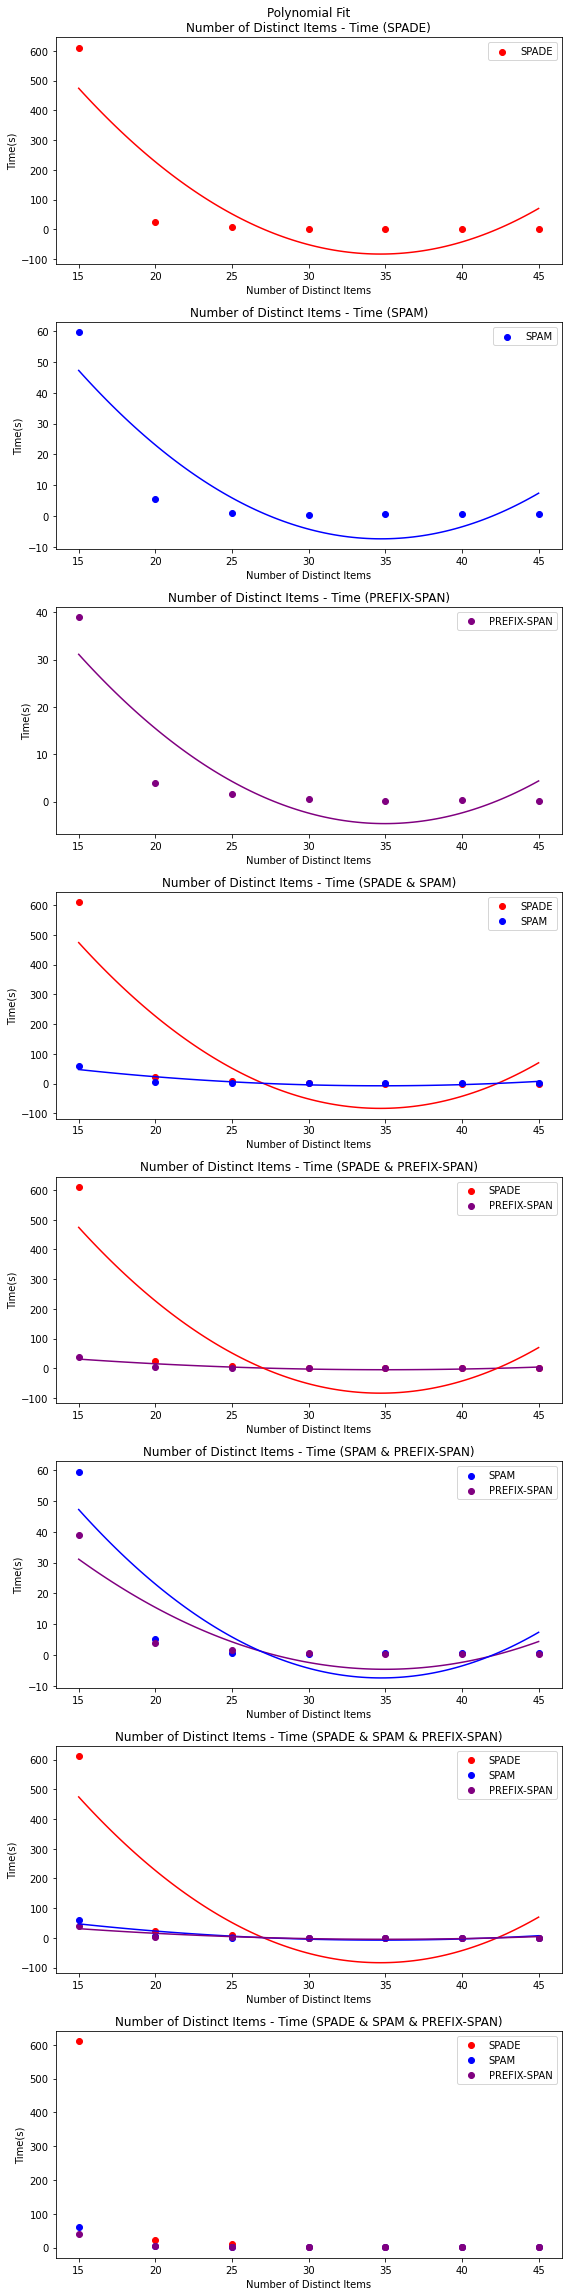

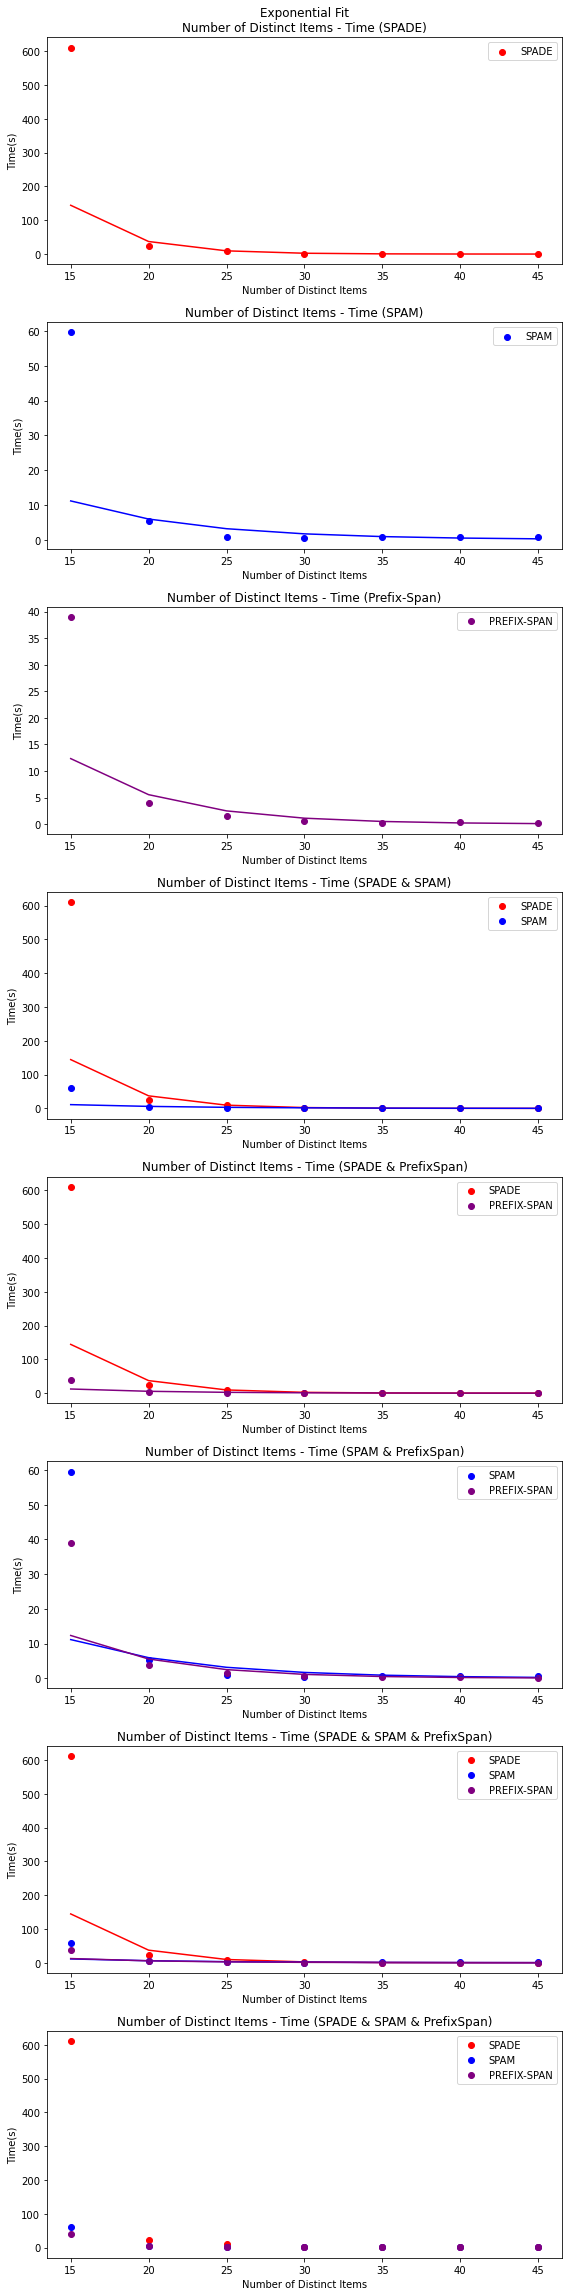

In [18]:
# Polynomial Fit
# Define the x and y values for the scatter plot
spade_x = size
spade_y = spade_duration_list

spam_x = size
spam_y = spam_duration_list

prefix_span_x = size
prefix_span_y = prefix_span_duration_list

# Fit a second-degree polynomial function to the data using polyfit
spade_fit = np.polyfit(spade_x, spade_y, 2)
spam_fit = np.polyfit(spam_x, spam_y, 2)
prefix_span_fit = np.polyfit(prefix_span_x, prefix_span_y, 2)

# Set up the figure with 3 subplots
plt.figure(figsize=(8, 32))

# Create the subplot for SPADE
plt.subplot(8, 1, 1)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
spade_curve = np.poly1d(spade_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Polynomial Fit\nNumber of Distinct Items - Time (SPADE)')
plt.legend()

# Create the subplot for SPAM
plt.subplot(8, 1, 2)
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
spam_curve = np.poly1d(spam_fit)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spam_range, spam_curve(spam_range), color='blue')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Number of Distinct Items - Time (SPAM)')
plt.legend()

# Create the subplot for PrefixSpan
plt.subplot(8, 1, 3)
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(prefix_span_range), color='purple')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Number of Distinct Items - Time (PREFIX-SPAN)')
plt.legend()

# Create the subplot for SPADE and SPAM
plt.subplot(8, 1, 4)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
spade_curve = np.poly1d(spade_fit)
spam_curve = np.poly1d(spam_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
plt.plot(spam_range, spam_curve(spam_range), color='blue')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Number of Distinct Items - Time (SPADE & SPAM)')
plt.legend()

# Create the subplot for SPADE and PrefixSpan
plt.subplot(8, 1, 5)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(prefix_span_range), color='purple')
plt.plot(spade_range, spade_curve(spade_range), color='red')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Number of Distinct Items - Time (SPADE & PREFIX-SPAN)')
plt.legend()

# Create the subplot for SPAM and PrefixSpan
plt.subplot(8, 1, 6)
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
plt.plot(prefix_span_range, prefix_span_curve(prefix_span_range), color='purple')
plt.plot(spam_range, spam_curve(spam_range), color='blue')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Number of Distinct Items - Time (SPAM & PREFIX-SPAN)')
plt.legend()

plt.subplot(8, 1, 7)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spade_curve = np.poly1d(spade_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
spam_curve = np.poly1d(spam_fit)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spam_range, spam_curve(spam_range), color='blue')
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(spam_range), color='purple')
# Add labels and title to the plot
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Number of Distinct Items - Time (SPADE & SPAM & PREFIX-SPAN)')
plt.legend()

plt.subplot(8, 1, 8)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
# Add labels and title to the plot
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Number of Distinct Items - Time (SPADE & SPAM & PREFIX-SPAN)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Exponential Fit
# Define the x and y values for the scatter plot
spade_x = np.array(size)
spade_y = spade_duration_list

spam_x = np.array(size)
spam_y = spam_duration_list

prefix_span_x = np.array(size)
prefix_span_y = prefix_span_duration_list

# Fit a second-degree polynomial function to the data using polyfit
spade_fit = np.polyfit(spade_x, np.log(spade_y), 1)
spam_fit = np.polyfit(spam_x, np.log(spam_y), 1)
prefix_span_fit = np.polyfit(prefix_span_x, np.log(prefix_span_y), 1)

# Create a figure with 8x6 size
plt.figure(figsize=(8, 32))

# Add subplots for each algorithm
plt.subplot(8, 1, 1)
# Create the scatter plot for SPADE
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Exponential Fit\nNumber of Distinct Items - Time (SPADE)')
plt.legend()

plt.subplot(8, 1, 2)
# Create the scatter plot for SPAM
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Number of Distinct Items - Time (SPAM)')
plt.legend()

plt.subplot(8, 1, 3)
# Create the scatter plot for PREFIX-SPAN
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Number of Distinct Items - Time (Prefix-Span)')
plt.legend()

plt.subplot(8, 1, 4)
# Create the scatter plot for SPADE and SPAM
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Number of Distinct Items - Time (SPADE & SPAM)')
plt.legend()

plt.subplot(8, 1, 5)
# Create the scatter plot for SPADE and PrefixSpan
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Number of Distinct Items - Time (SPADE & PrefixSpan)')
plt.legend()

plt.subplot(8, 1, 6)
# Create the scatter plot for SPAM and PrefixSpan
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Number of Distinct Items - Time (SPAM & PrefixSpan)')
plt.legend()

plt.subplot(8, 1, 7)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Number of Distinct Items - Time (SPADE & SPAM & PrefixSpan)')
plt.legend()

plt.subplot(8, 1, 8)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
plt.xlabel('Number of Distinct Items')
plt.ylabel('Time(s)')
plt.title('Number of Distinct Items - Time (SPADE & SPAM & PrefixSpan)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [19]:
# CASE 4
spade_duration_list = []
spam_duration_list = []
prefix_span_duration_list = []
size = []

#num_sequences = 10
#max_sequence_length = 20
#num_items = 5

dataset_generation_obj = dataset_generation.Dataset
spade_obj = spade.Spade
spam_obj = spam.Spam

for i in range(1, 16):
  gap1 = 25
  gap2 = 5
  gap3 = 3
  size.append(i)
  sequences = dataset_generation.Dataset.generate(i*gap1, i*gap2, i*gap3)
  # Print the generated sequences
  print("Generated sequences:\n")
  for seq in sequences:
      print(seq)
  print('\n')

  support = 0.8*i*gap1
  print(support)

  # SPADE
  start_time = time.perf_counter()

  spade_obj.run(sequences, support)

  end_time = time.perf_counter()

  duration = end_time-start_time

  spade_duration_list.append(duration)
  print("Duration SPADE: "+ str(duration))

  # SPAM
  start_time = time.perf_counter()

  spam_obj.run(sequences, support)

  end_time = time.perf_counter()

  duration = end_time - start_time

  spam_duration_list.append(duration)
  print("Duration SPAM: "+ str(duration))
  
  # PrefixSpan
  start_time = time.perf_counter()

  prefix_span_obj.run(sequences, support)

  end_time = time.perf_counter()

  duration = end_time - start_time

  prefix_span_duration_list.append(duration)
  print("Duration PrefixSpan: "+ str(duration))            


Generated sequences:

[{2}, {2, 3}, {3}, {2}]
[{1, 2}, {1, 3}, {1}]
[{1}, {1, 2, 3}, {3}]
[{1, 2, 3}, {1, 2}]
[{1}, {1}, {1, 2}, {3}]
[{1, 2}, {1, 2, 3}]
[{2}, {1, 2}, {2}, {1}]
[{3}, {1, 2}, {1}, {1}]
[{2}, {1, 2, 3}, {2}]
[{3}, {1, 2}, {2}, {3}]
[{2, 3}, {1, 2, 3}]
[{1, 2}, {1, 3}, {2}]
[{1, 2, 3}, {1}, {1}]
[{1}, {2}, {1, 2}, {2}]
[{1, 2, 3}, {3}, {3}]
[{1, 2}, {1, 2, 3}]
[{1}, {1, 2, 3}, {3}]
[{1, 2, 3}, {1, 2}]
[{1, 2, 3}, {1, 3}]
[{1}, {3}, {3}, {1, 3}]
[{1, 2, 3}, {2, 3}]
[{1, 3}, {1}, {1, 2}]
[{2}, {1, 2, 3}, {1}]
[{2, 3}, {2}, {1, 3}]
[{1, 2}, {1, 2, 3}]


20.0
SPADE: Number of frequent sequences: 4
Duration SPADE: 0.005868399999599205
SPAM: Number of frequent sequences: 4
Duration SPAM: 0.0011257000005571172
Prefix Span: Number of frequent sequences: 4
Duration PrefixSpan: 0.003694099999847822
Generated sequences:

[{3, 4}, {4, 6}, {1, 2, 3, 4, 6}, {2}]
[{1, 2, 3, 4}, {2, 4, 5}, {2, 3, 5}]
[{3, 5, 6}, {2, 4, 5}, {1, 6}, {3, 5}]
[{3}, {1, 3, 4}, {1, 2, 3, 4, 6}, {1}]
[{5}, {2,

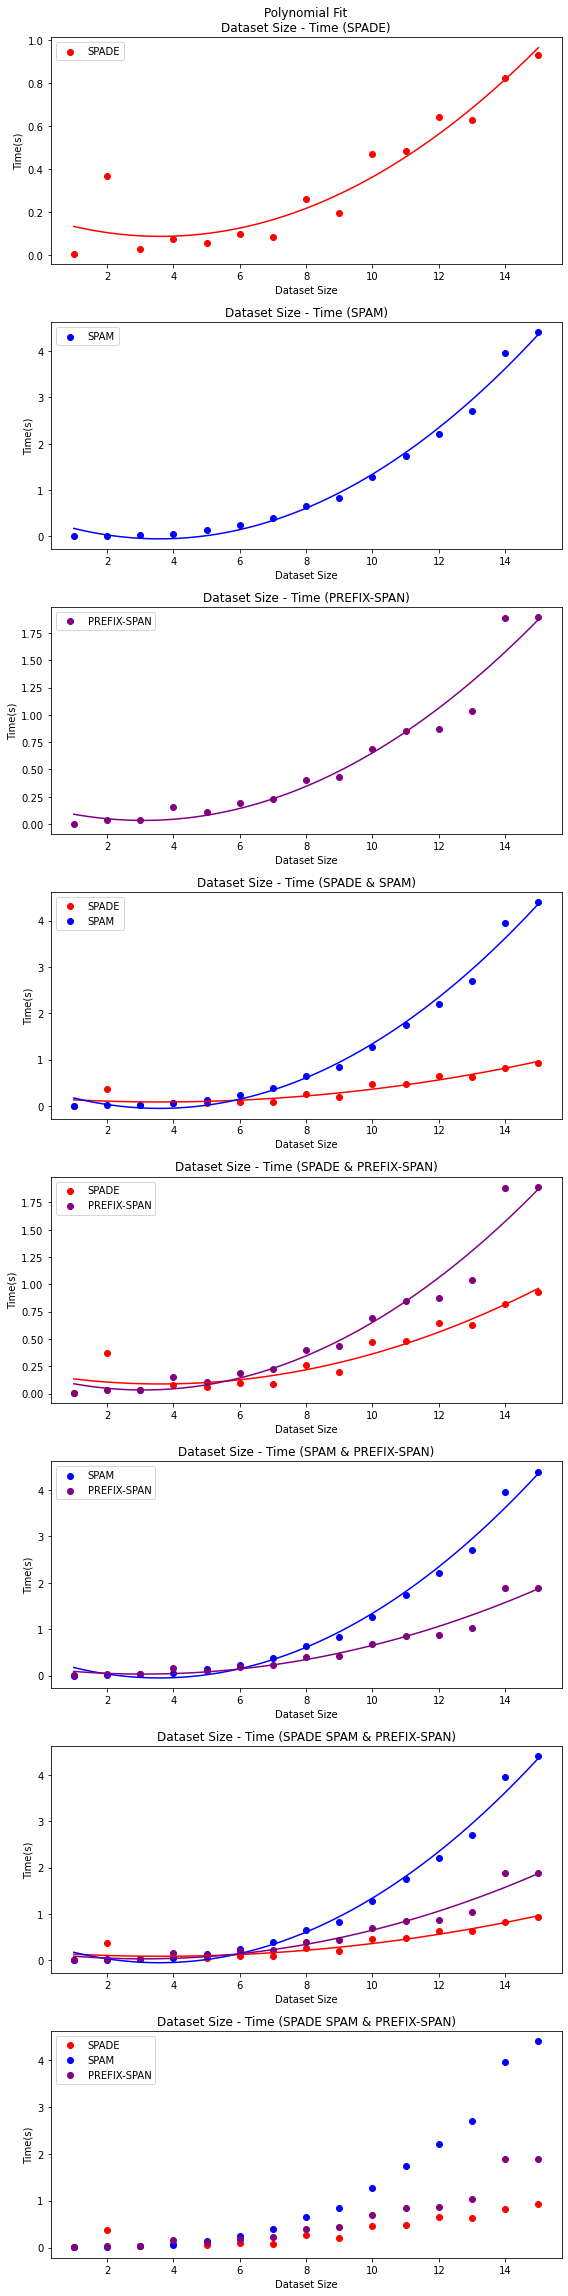

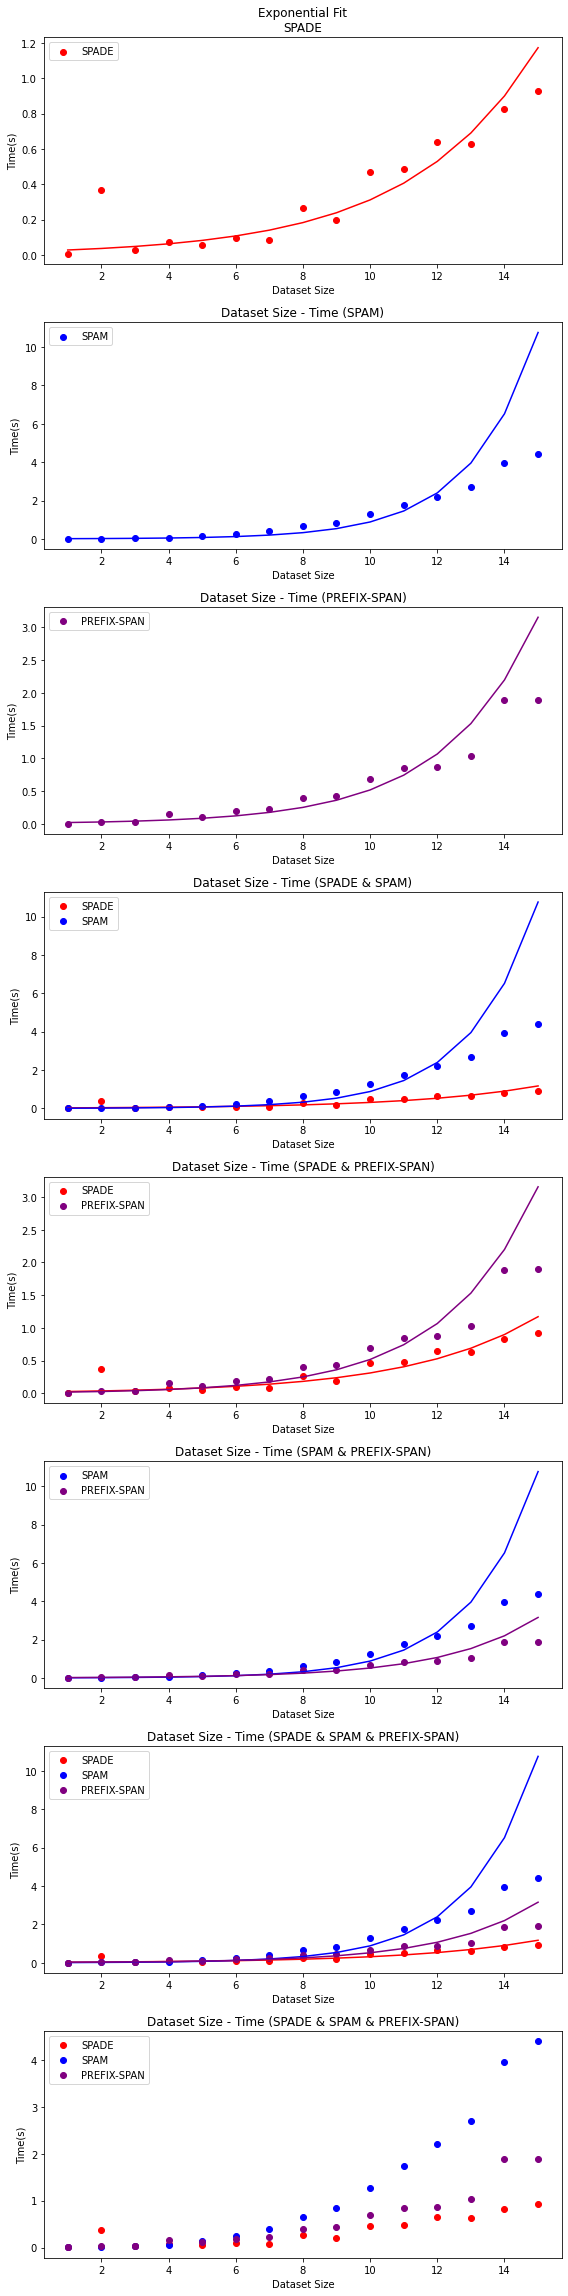

In [20]:
# Polynomial Fit
# Define the x and y values for the scatter plot
spade_x = size
spade_y = spade_duration_list

spam_x = size
spam_y = spam_duration_list

prefix_span_x = size
prefix_span_y = prefix_span_duration_list

# Fit a second-degree polynomial function to the data using polyfit
spade_fit = np.polyfit(spade_x, spade_y, 2)
spam_fit = np.polyfit(spam_x, spam_y, 2)
prefix_span_fit = np.polyfit(prefix_span_x, prefix_span_y, 2)

# Create the figure and subplots
fig = plt.figure(figsize=(8, 32))

# Subplot for SPADE
plt.subplot(8, 1, 1)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
spade_curve = np.poly1d(spade_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Polynomial Fit\nDataset Size - Time (SPADE)')
plt.legend()

# Subplot for SPAM
plt.subplot(8, 1, 2)
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
spam_curve = np.poly1d(spam_fit)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spam_range, spam_curve(spam_range), color='blue')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Dataset Size - Time (SPAM)')
plt.legend()

# Subplot for PREFIX-SPAN
plt.subplot(8, 1, 3)
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(prefix_span_range), color='purple')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Dataset Size - Time (PREFIX-SPAN)')
plt.legend()

# Create a subplot for SPADE and SPAM
ax1 = plt.subplot(8, 1, 4)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
spade_curve = np.poly1d(spade_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
spam_curve = np.poly1d(spam_fit)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spam_range, spam_curve(spam_range), color='blue')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Dataset Size - Time (SPADE & SPAM)')
plt.legend()

# Create a subplot for SPADE and PREFIX-SPAN
plt.subplot(8, 1, 5)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spade_curve = np.poly1d(spade_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(prefix_span_range), color='purple')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Dataset Size - Time (SPADE & PREFIX-SPAN)')
plt.legend()

# Create a subplot for SPAM and PREFIX-SPAN
plt.subplot(8, 1, 6)
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spam_curve = np.poly1d(spam_fit)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spam_range, spam_curve(spam_range), color='blue')
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(prefix_span_range), color='purple')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Dataset Size - Time (SPAM & PREFIX-SPAN)')
plt.legend()

plt.subplot(8, 1, 7)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spade_curve = np.poly1d(spade_fit)
spade_range = np.linspace(min(spade_x), max(spade_x), 100)
plt.plot(spade_range, spade_curve(spade_range), color='red')
spam_curve = np.poly1d(spam_fit)
spam_range = np.linspace(min(spam_x), max(spam_x), 100)
plt.plot(spam_range, spam_curve(spam_range), color='blue')
prefix_span_curve = np.poly1d(prefix_span_fit)
prefix_span_range = np.linspace(min(prefix_span_x), max(prefix_span_x), 100)
plt.plot(prefix_span_range, prefix_span_curve(spam_range), color='purple')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Dataset Size - Time (SPADE SPAM & PREFIX-SPAN)')

plt.subplot(8, 1, 8)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Dataset Size - Time (SPADE SPAM & PREFIX-SPAN)')

# Add a legend to the plot
plt.legend()

# Adjust subplots' spacing and show the plot
plt.tight_layout()
plt.show()



# Exponential Fit
# Define the x and y values for the scatter plot
spade_x = np.array(size)
spade_y = spade_duration_list

spam_x = np.array(size)
spam_y = spam_duration_list

prefix_span_x = np.array(size)
prefix_span_y = prefix_span_duration_list

# Fit a second-degree polynomial function to the data using polyfit
spade_fit = np.polyfit(spade_x, np.log(spade_y), 1)
spam_fit = np.polyfit(spam_x, np.log(spam_y), 1)
prefix_span_fit = np.polyfit(prefix_span_x, np.log(prefix_span_y), 1)

# Set the figure size
plt.figure(figsize=(8, 32))

# Create a subplot for SPADE
plt.subplot(8, 1, 1)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Exponential Fit\nSPADE')
plt.legend()

# Create a subplot for SPAM
plt.subplot(8, 1, 2)
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Dataset Size - Time (SPAM)')
plt.legend()

# Create a subplot for PREFIX-SPAN
plt.subplot(8, 1, 3)
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Dataset Size - Time (PREFIX-SPAN)')
plt.legend()

# Create a subplot for SPADE and SPAM
plt.subplot(8, 1, 4)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Dataset Size - Time (SPADE & SPAM)')
plt.legend()


# Create a subplot for SPADE and PREFIX-SPAN
plt.subplot(8, 1, 5)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Dataset Size - Time (SPADE & PREFIX-SPAN)')
plt.legend()

# Create a subplot for SPAM and PREFIX-SPAN
plt.subplot(8, 1, 6)
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Dataset Size - Time (SPAM & PREFIX-SPAN)')
plt.legend()

plt.subplot(8, 1, 7)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
spade_curve = np.exp(spade_fit[1]) * np.exp(spade_fit[0] * spade_x)
plt.plot(spade_x, spade_curve, color='red')
spam_curve = np.exp(spam_fit[1]) * np.exp(spam_fit[0] * spam_x)
plt.plot(spam_x, spam_curve, color='blue')
prefix_span_curve = np.exp(prefix_span_fit[1]) * np.exp(prefix_span_fit[0] * prefix_span_x)
plt.plot(prefix_span_x, prefix_span_curve, color='purple')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Dataset Size - Time (SPADE & SPAM & PREFIX-SPAN)')
plt.legend()

plt.subplot(8, 1, 8)
plt.scatter(spade_x, spade_y, color='red', label='SPADE')
plt.scatter(spam_x, spam_y, color='blue', label='SPAM')
plt.scatter(prefix_span_x, prefix_span_y, color='purple', label='PREFIX-SPAN')
plt.xlabel('Dataset Size')
plt.ylabel('Time(s)')
plt.title('Dataset Size - Time (SPADE & SPAM & PREFIX-SPAN)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
